# Problème 1 : Planification de rencontres sportives

(http://www.csplib.org/ => Scheduling => prob026: round robin tournaments)

## Description du problème

Nous considérons les spécifications suivantes :

- un tournoi regroupe un ensemble T d'équipes (|T| pair)
- chaque équipe rencontre toutes les autres exactement une fois. La notion de matches aller/retour n'est pas traité dans ce problème
- le tournoi se déroule sur |T|-1 semaines. Chaque équipe joue une et une seule fois chaque semaine
- la programmation d'une rencontre se déroule sur un terrain, à une certaine date. Nous emploierons le terme générique de période, au nombre de |T|/2. A chaque période de chaque semaine correspond un match.
- Aucune équipe ne peut jouer plus de deux fois sur une période.


Le problème est de déterminer une programmation qui respecte l'ensemble de ces contraintes.

Le Tableau 1 montre un exemple de planification vérifiant l'ensemble des contraintes pour |T|=8 équipes numérotées de 0 à 7 (il y a donc 7 semaines et 4 périodes).


|           | Période 0 | Période 1 | Période 2 | Période 3 |
|-----------|-----------|-----------|-----------|-----------|
| Semaine 0 | 0 vs 1    | 2 vs 3    | 4 vs 5    | 6 vs 7    |
| Semaine 1 | 0 vs 2    | 1 vs 7    | 3 vs 5    | 4 vs 6    |
| Semaine 2 | 4 vs 7    | 0 vs 3    | 1 vs 6    | 2 vs 5    |
| Semaine 3 | 3 vs 6    | 5 vs 7    | 0 vs 4    | 1 vs 2    |
| Semaine 4 | 3 vs 7    | 1 vs 4    | 2 vs 6    | 0 vs 5    |
| Semaine 5 | 1 vs 5    | 0 vs 6    | 2 vs 7    | 3 vs 4    |
| Semaine 6 | 2 vs 4    | 5 vs 6    | 0 vs 7    | 1 vs 3    |

Tableau 1 - Exemple de planification pour 8 équipes.

Comme dans le tableau précédent, une configuration peut être représentée sous la forme d'un tableau à deux dimensions avec les semaines en lignes et les périodes en colonnes.

Chaque colonne vérifie la contrainte de cardinalité pour laquelle aucune équipe n'apparaît plus de deux fois. Sur chaque ligne chaque équipe apparaît exactement une fois. Ce qui est équivalent à dire que toutes les équipes d'une ligne sont différentes. Enfin, il existe une contrainte globale sur tout le tableau : chaque match n'y apparaît qu'une seule fois, i.e. tous les matches sont différents.

Planifier les tournois entre T équipes (T pair) sur T-1 semaines, chaque semaine étant
découpée en T/2 périodes avec les contraintes suivantes :
- unicité / semaine : chaque équipe joue exactement 1 fois / semaine,
- double / période : aucune équipe ne peut jouer plus de 2 fois / période,
- tournoi simple : chaque équipe joue contre toutes les autres exactement une fois.
Remarque: problème se résout en temps linéaire si (T -1) MOD 3=0 (T=10, 16, 22, 28, 34, 40, 46)
problème encore ouvert dans le cas général (T=12, 14, 18, 20, 24, 26, 30, 32, 36, 38, 42, 44...)

# Représentation du problème 

## Equipes, rencontres(/matchs), semaines, périodes 

Pour placer les `n` équipes (`n` étant pair) dans les `r` rencontres (`r= n/2 * (n-1)`) nous utiliseront une matrice de taille `s*p` ou `s` représente le nombre de semaines (`s = n -1`) et `p` le nombre de périodes.

## Contraintes

Rappel des contraintes :
- unicité / semaine : chaque équipe joue exactement 1 fois par semaine,
- double / période : aucune équipe ne peut jouer plus de 2 fois par période,
- tournoi simple : chaque équipe joue contre toutes les autres exactement une fois.

### Contrainte sur les matchs

La contrainte sur les matchs est implicitement résolue en générant toutes les rencontres possibles et en les utilisant toutes.

### Contrainte sur les semaines

Pour gérer cette contrainte nous placerons tous les matchs générés sur le planning sans se préoccuper de la contrainte sur les périodes.

La fonction `semaine_ok(semaine, n)` renverra -1 si il y a une incohérence dans la semaine donnée(deux fois la même équipe), 0 si il n'y a pas d'incohérence mais que toutes les équipes ne sont pas utilisés (si la semaine n'est pas encore totalement plannifiée) et 1 la semaine est valide.

### Contrainte sur  les périodes

L'algorithme implémenté sera chargé de résoudre la contrainte sur les périodes.

Pour vérifier la validité d'une période nous utiliserons la fonction `periode_ok(periode, n)` qui renvoie le nombre d'incohérences vis à vis de la contrainte sur les périodes.

# Recherche de solutions

Population parameters :
	Individuals : <class 'src.individu_sts.IndividualSTS'>
	Size of an individual : 15
	Size of the population : 100
	nb turn max : 5000
	Number of individuals selected each turns : 20
	Selection : ['select_tournament']
	Crossover : ['pmx'] (100%)
	Mutation : ['individual'] (40.0%)
	Insertion : age
turn 0 max -11 diversity 100
swap
swap
swap
insert
insert
swap
swap
swap
turn 1 max -11 diversity 100
insert
swap
swap
insert
swap
swap
insert
insert
turn 2 max -11 diversity 100
insert
local_search
swap
swap
insert


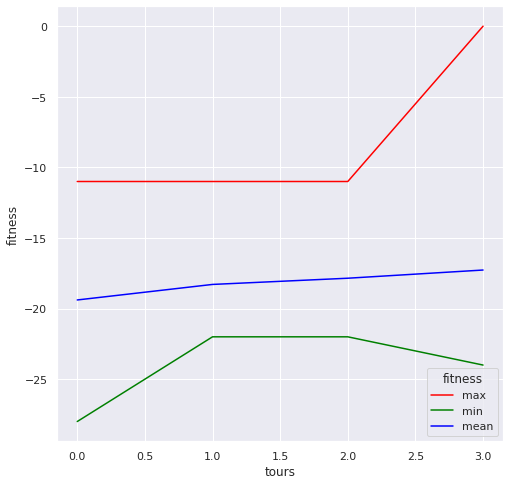

In [1]:
from pprint import pprint
from algo_gen.classes import Population
# from algo_gen.tools.plot import show_stats
import random
from src.individu_sts import IndividualSTS
from src.outils import *
n = 6
n, s, p, r = conditions(n)
# affiche_conditions(n, s, p, r)

def final_condition(pop):
    if pop.stats['max_fitness'][-1] == 0:
        return False
    else:
        return not (pop.nb_turns == pop.parameters['nb turn max'])

def each_turn(pop):
    print(f'turn {pop.nb_turns} max {pop.stats["max_fitness"][-1]} diversity {pop.stats["diversity"][-1]}')
    if pop.stats["diversity"][-1] < int(pop.parameters["population size"] * 0.4):
        diff_indiv = set([i for i,_,_ in pop.individuals])
        print(f'nb_diff indiv : {len(diff_indiv)}')
        pop.individuals = []
        for indiv in diff_indiv:
            pop.individuals.append((indiv, indiv.fitness(), 0))
        for i in range(len(diff_indiv), pop.parameters["population size"]):
            new_indiv = IndividualSTS(pop.parameters)
            pop.individuals.append((new_indiv, new_indiv.fitness(), 0))
#         for i, ifa in enumerate(pop.individuals):
#             indiv, _, _ = ifa
#             if indiv in diff_indiv:
#                 diff_indiv.remove(indiv)
#                 random.shuffle(indiv.sequence)
#                 pop.individuals[i] = (indiv, indiv.fitness(), 0)
        
#         first = pop.individuals[0:]
#         for i, ifa in enumerate(pop.individuals[1:]):
#             indiv, _, _ = ifa
#             if indiv == first:
#                 print('randomize')
#                 random.shuffle(indiv.sequence)
#                 pop.individuals[i] = (indiv, indiv.fitness(), 0)

parametres = {
    'individual': IndividualSTS,
    'only weeks': False,
    'number of team': n,

    'population size': 100,
    'chromosome size': s * p,

    'termination_condition': final_condition,
    'function_each_turn': each_turn,
    'nb turn max': 5000,

    'selection': ['select_tournament'],
    'proportion selection': 20,

    'crossover': ['pmx'],
    'proportion crossover': 1,

    'mutation': ['individual'],
    'proportion mutation': 0.4,

    'insertion': 'age',
}
population = Population(parametres, description=True)
population.start()

show_stats(population.stats)

In [2]:
best = population.individuals[0][0]
best

[[(0, 1), (2, 4), (3, 5)],
 [(1, 2), (0, 3), (4, 5)],
 [(3, 4), (1, 5), (0, 2)],
 [(0, 5), (2, 3), (1, 4)],
 [(2, 5), (0, 4), (1, 3)]] 0

In [ ]:
# if best.fitness() == 0:
#     m = r_to_m(best.sequence,s,p)
#     pprint(m)
#     pprint(matrice_incoherences_semaine(m,n))
#     pprint(matrice_incoherences_periode(transpose(m),n))
#     from src.recherche_locale import recherche_locale
#     m_t = transpose(m)
#     m_t, t, nb_inco_p = recherche_locale(m_t, n, matrice_incoherences_periode, nombre_incoherences_periodes, voisins_colonne,200)

In [ ]:
# pprint(matrice_incoherences_periode(m_t,n))